In [152]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import zip_longest
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from itertools import zip_longest

Data generation

In [153]:
np.random.seed(219)
N = 200
low = -3.0
high = 4.0
a = 4
b = -3
data_x = np.random.uniform(-3.0, 4, N)
data_y = np.zeros(N)

for i, x in enumerate(data_x):
    scale = -(x - low) * (x - high) / 3. +1.5
    data_y[i] = a * x + b + np.random.normal(loc = 0.0, scale = scale, size = 1)

In [154]:
observation = 1000 #ตัวเเปรนี้จะบอกขนาดของข้อมูล
#np.random.uniform(low, high, size)

xs = np.random.uniform(low = -10, high = 10, size = (observation, 1))
#xs 1000x1
zs = np.random.uniform(low = -10, high = 10, size = (observation, 1))
#zs 1000x1
inputs = np.column_stack((xs, zs))# ตัวเเปรนี้รวม xs, zs เข้าด้วยกัน

# ค่า input k = 2
# จำนวนobservation n = 1000

#Create date target 
#targets = f(x,z) = 2*x - 3*z +5  + noise
#2* คือ w1, 3* คือ w2, 5 คือ bias
noise = np.random.uniform(-1, 1, (observation,1 ))

targets = 2*xs - 3*zs + 5 + noise
# ค่าoutput m = 1

init_range = 0.1
learning_rate = 0.01
n = 1000
k = 2
m = 1

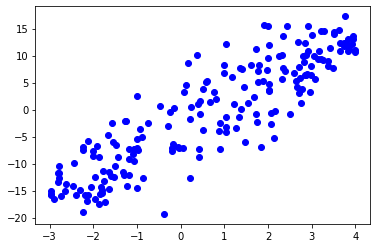

In [155]:
plt.plot(data_x, data_y, 'bo')
plt.show()

In [156]:
X = np.concatenate((data_x.reshape(N, 1), np.ones(N).reshape(N, 1)), axis=1)
Y = data_y.reshape(N, 1)
print(f"X shape {X.shape}\nY shape {Y.shape}")

X shape (200, 2)
Y shape (200, 1)


Build LinearRegression Model

In [157]:
class LinearRegression(object):
    # constructor กำหนด Paramiter ต่าง ๆ
    def __init__(self, data_x, data_y,
                w_init = None, b_init = None, learning_rate = 0.1 ):
        
        scale = 4.0
        self.x = data_x
        self.y = data_y
        self.lr = learning_rate
        
        
        #เอาไว้เก็บการ updata หรือ history ต่างๆ
        self.loss_history = []
        self.epochs = []
        self.w_history = []
        self.b_history = []
        
        
        '''
        
        ตั้งเงื่อนไข ของการกำหนดค่า Innitizer ของ W, B
        ถ้ามีการรับค่า paramiter เข้ามาจะให้ w_init and b_init เป็น ค่าที่รับเข้ามาเลย
    
        '''
        if w_init is not None:
            #self.w = w_init 
            self.w = np.random.uniform(low = -w_init, high = w_init, size = (2,1))
            #print(f"Weigth shape {self.shape}")
            
        else:
            #init w
            self.w = np.random.uniform(low = a - scale, high = a + scale)
        
        if b_init is not None:
            #self.b = b_init
            self.b = np.random.uniform(low = -b_init, high = b_init, size = (1, 2))
        else:
            #init b
            self.b = np.random.uniform(low = a - scale, high = a + scale)
        
        print(f"Weigths {self.w.shape}\nBiases {self.b.shape}")
        
    
    def inference(self, x):
        '''
        Inference เป็น function ของ model 
        y_pred = W*X + B
        หรือ InearRegression 
        
        ให้ Return คำตอบ ที่ได้จากการคำนวน ออกจาก Method
        
        '''
        
        y_pred = np.dot(x, self.w)+self.b
        
        return y_pred
        
    def loss_plot(self, w, b):
        
        # ทำการคูณ พร้อมกับเปลี่ยน Dimanstion
        y_pred = np.dot(x, self.w) + self.b
        
        loss_plot = 0.5 * (y_pred - np.expand_dims(self.y, axis = 1))**2
        loss_plot = np.mean(loss_plot, axis = 0)
        
        return loss_plot
    
    def loss_function(self, labels, prediction):
        #MSE
        #Return mean ของ data shape : 0-rank Tensor (Vector) array
        
        loss = 0.5 * np.mean((prediction - labels)**2)
        
        return loss
    
        
    def loss_derivative(self):
        """
        การหาอนุพัน หรือกับ ดิป 
        
        Return :
            dw: dl /dw , ของค่า mean
            db: dl / db
        """
        
        dw = np.mean((self.y_pred - self.y) * self.x)
        db = np.mean(self.y_pred - self.y)
        return dw, db
    
    def updata_weights(self):
        """
        w = w - learning_rate * (dl/dw)
        
        """
        self.w = self.w - self.lr * self.dw
        self.b = self.b - self.lr * self.db
        
    def history(self, loss, w, b):
        
        self.loss_history.append(loss)
        self.w_history.append(w)
        self.b_history.append(b)
        
    def fit(self, max_epoch):
        
        pre_loss = 0.
        for epoch in range(max_epoch):
            
            print(epoch)
            self.y_pred = self.inference(self.x)
            self.loss = self.loss_function(self.y, self.y_pred)
            self.history(self.loss, self.w, self.b)

            self.dw, self.db = self.loss_derivative()
            self.updata_weights()
            #if np.abs(pre_loss - self.loss) <1e-6:
                
            self.loss = self.loss_function(self.y, self.y_pred)
            self.history(self.loss, self.w, self.b)
            print(f"Epoch {epoch+1} loss: {self.loss}")
            #Weights {self.w} Biases {self.b}")

                #break
            pre_loss = self.loss
            
        self.epochs.append(epoch)
        self.w_history = np.array(self.w_history)
        self.b_history = np.array(self.b_history)
        self.plat = np.concatenate((np.expand_dims(self.w_history, axis = 1), np.expand_dims(self.b_history, 1)), axis = 1)


In [158]:
%time
epoch = 1000
model = LinearRegression(inputs, targets, 2, 1, 0.001)
#print(f'Weigths shape {self.w}')

Wall time: 0 ns
Weigths (2, 1)
Biases (1, 2)


In [159]:
model.fit(epoch)

0
Epoch 1 loss: 133.72477687883557
1
Epoch 2 loss: 131.61765820624132
2
Epoch 3 loss: 129.6451918501963
3
Epoch 4 loss: 127.79868102336829
4
Epoch 5 loss: 126.06999088100753
5
Epoch 6 loss: 124.45151220867815
6
Epoch 7 loss: 122.93612745652487
7
Epoch 8 loss: 121.51717896843805
8
Epoch 9 loss: 120.18843926427778
9
Epoch 10 loss: 118.94408324248545
10
Epoch 11 loss: 117.77866217898269
11
Epoch 12 loss: 116.68707940627955
12
Epoch 13 loss: 115.66456756421276
13
Epoch 14 loss: 114.70666732075354
14
Epoch 15 loss: 113.80920746788571
15
Epoch 16 loss: 112.96828630369569
16
Epoch 17 loss: 112.18025421755657
17
Epoch 18 loss: 111.44169740066071
18
Epoch 19 loss: 110.7494226091795
19
Epoch 20 loss: 110.10044291202723
20
Epoch 21 loss: 109.49196435960324
21
Epoch 22 loss: 108.92137351399695
22
Epoch 23 loss: 108.38622578498753
23
Epoch 24 loss: 107.88423451976588
24
Epoch 25 loss: 107.41326079767335
25
Epoch 26 loss: 106.97130388439753
26
Epoch 27 loss: 106.55649230301077
27
Epoch 28 loss: 106.

Epoch 427 loss: 94.77309418520441
427
Epoch 428 loss: 94.7631709993679
428
Epoch 429 loss: 94.7532676470116
429
Epoch 430 loss: 94.74338408849289
430
Epoch 431 loss: 94.73352028424846
431
Epoch 432 loss: 94.72367619479404
432
Epoch 433 loss: 94.71385178072437
433
Epoch 434 loss: 94.70404700271298
434
Epoch 435 loss: 94.69426182151201
435
Epoch 436 loss: 94.68449619795216
436
Epoch 437 loss: 94.67475009294233
437
Epoch 438 loss: 94.66502346746968
438
Epoch 439 loss: 94.65531628259936
439
Epoch 440 loss: 94.64562849947431
440
Epoch 441 loss: 94.63596007931527
441
Epoch 442 loss: 94.6263109834204
442
Epoch 443 loss: 94.61668117316532
443
Epoch 444 loss: 94.60707061000285
444
Epoch 445 loss: 94.59747925546287
445
Epoch 446 loss: 94.5879070711522
446
Epoch 447 loss: 94.57835401875441
447
Epoch 448 loss: 94.5688200600297
448
Epoch 449 loss: 94.55930515681466
449
Epoch 450 loss: 94.54980927102221
450
Epoch 451 loss: 94.54033236464146
451
Epoch 452 loss: 94.53087439973746
452
Epoch 453 loss: 9

Epoch 868 loss: 91.86284425648599
868
Epoch 869 loss: 91.85873776317521
869
Epoch 870 loss: 91.85463947744041
870
Epoch 871 loss: 91.85054938287708
871
Epoch 872 loss: 91.84646746311346
872
Epoch 873 loss: 91.84239370181058
873
Epoch 874 loss: 91.83832808266212
874
Epoch 875 loss: 91.83427058939431
875
Epoch 876 loss: 91.83022120576594
876
Epoch 877 loss: 91.82617991556822
877
Epoch 878 loss: 91.82214670262483
878
Epoch 879 loss: 91.81812155079172
879
Epoch 880 loss: 91.81410444395712
880
Epoch 881 loss: 91.8100953660415
881
Epoch 882 loss: 91.8060943009974
882
Epoch 883 loss: 91.80210123280948
883
Epoch 884 loss: 91.7981161454944
884
Epoch 885 loss: 91.7941390231008
885
Epoch 886 loss: 91.79016984970913
886
Epoch 887 loss: 91.78620860943172
887
Epoch 888 loss: 91.78225528641264
888
Epoch 889 loss: 91.77830986482762
889
Epoch 890 loss: 91.77437232888406
890
Epoch 891 loss: 91.7704426628209
891
Epoch 892 loss: 91.76652085090859
892
Epoch 893 loss: 91.76260687744906
893
Epoch 894 loss: 9

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 2 and the array at index 1 has size 1

In [164]:
model.y_pred.shape

(1000, 2)

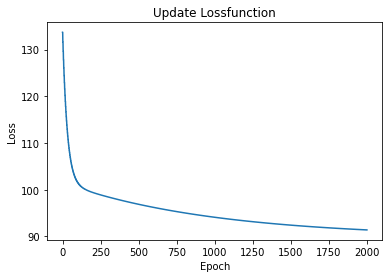

In [160]:
plt.plot(model.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Update Lossfunction")
plt.show()